In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

pd.set_option('display.max_column', None)

In [3]:
rice_df = pd.read_excel('rice_w2vec_3mer_dataset.xlsx')
rice_df = rice_df.drop(['circName','tissue','chr','start','end','strand','start_anno', 'circID',	'gene', 'isoform', 'width', 'detection_score', 'stress_detection_score', 'end_anno', 'antisense', 'algorithm', 'seq', 'exonSeq', 'predAA', 'miRNA','superCircRNARegion'], axis=1)

In [4]:
maize_df = pd.read_excel('maize_w2vec_3mer_dataset.xlsx')
maize_df = maize_df.drop(['circName','tissue','chr','start','end','strand','start_anno', 'circID',	'gene', 'isoform', 'width', 'detection_score', 'stress_detection_score', 'end_anno', 'antisense', 'algorithm', 'seq', 'exonSeq', 'predAA', 'miRNA','superCircRNARegion'], axis=1)

In [5]:
df = rice_df._append(maize_df, ignore_index = True)

In [6]:
df.head(2)

stress  wc_3mer_1  wc_3mer_2  wc_3mer_3  wc_3mer_4  wc_3mer_5  wc_3mer_6  \
0      -  -8.660600 -17.171770 -20.124799  10.607480  -0.194991   1.568289   
1      -  -4.623322 -42.058749 -73.491472 -51.222795  83.974883 -47.219114   

   wc_3mer_7  wc_3mer_8  wc_3mer_9  wc_3mer_10  wc_3mer_11  wc_3mer_12  \
0   3.896590   7.622823  -2.833792   13.902024    0.901370   34.078852   
1 -20.222901  29.187759 -17.144830   37.219912   23.798238   75.641953   

   wc_3mer_13  wc_3mer_14  wc_3mer_15  wc_3mer_16  wc_3mer_17  wc_3mer_18  \
0    7.308762  -22.336659   -6.828404   -8.725470   -8.180239   11.367680   
1    4.870120  -70.222621  -82.996107   33.535224   76.461872   32.874154   

   wc_3mer_19  wc_3mer_20  wc_3mer_21  wc_3mer_22  wc_3mer_23  wc_3mer_24  \
0   -4.852785  -13.413974  -27.984812    3.740348   -7.190613    0.278378   
1   -6.631312  -15.925581 -112.060691   -2.903517    2.948585  -62.907868   

   wc_3mer_25  wc_3mer_26  wc_3mer_27  wc_3mer_28  wc_3mer_29  wc_3mer_30  \
0   -3.571699    9.958542   -5.320684   -2.488032  -18.012581    8.652445   
1  -66.399708  143.480368  -15.982585   -7.881710   71.077848   23.222897   

   wc_3mer_31  wc_3mer_32  wc_3mer_33  wc_3mer_34  wc_3mer_35  wc_3mer_36  \
0   -6.574689    9.127947   17.521066   23.482748  -23.985975    3.841062   
1    8.554504   -6.788022   21.995903    6.561046  -37.298742   62.109498   

   wc_3mer_37  wc_3mer_38  wc_3mer_39  wc_3mer_40  wc_3mer_41  wc_3mer_42  \
0    3.032056    2.956034  -13.725450    0.347066   -6.722355  -20.930106   
1  -38.099622  -14.900497  -47.619993   43.699845  -59.877709  -77.359248   

   wc_3mer_43  wc_3mer_44  wc_3mer_45  wc_3mer_46  wc_3mer_47  wc_3mer_48  \
0    7.578275   -7.379258   27.989736    4.455084   13.222476   -2.601977   
1   68.939810  -29.003005   74.874799    3.805252   61.622146  -95.765680   

   wc_3mer_49  wc_3mer_50  wc_3mer_51  wc_3mer_52  wc_3mer_53  wc_3mer_54  \
0   20.500052   -5.385517   11.915223   11.850148   11.701270    2.695746   
1   80.274650  -72.240870   34.492799   38.737359   89.357015  -14.975053   

   wc_3mer_55  wc_3mer_56  wc_3mer_57  wc_3mer_58  wc_3mer_59  wc_3mer_60  \
0  -21.976927  -12.450649   -8.376489   -9.521074   28.565338     7.25165   
1   24.437080  -68.490463   20.158427   14.177653   81.437811    -4.52417   

   wc_3mer_61  wc_3mer_62  wc_3mer_63  wc_3mer_64  
0  -18.073032   -6.670159   -3.779034    1.302005  
1   21.867150  -10.532807  -39.172970   63.339612

### Drought Analysis

In [7]:
df_drought = df.query('stress == "-" or stress == "drought"').replace('-', 0).replace('drought', 1)
df_drought.head()

<ipython-input-7-63aff892d1d9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_drought = df.query('stress == "-" or stress == "drought"').replace('-', 0).replace('drought', 1)


stress  wc_3mer_1  wc_3mer_2  wc_3mer_3  wc_3mer_4  wc_3mer_5  wc_3mer_6  \
0       0  -8.660600 -17.171770 -20.124799  10.607480  -0.194991   1.568289   
1       0  -4.623322 -42.058749 -73.491472 -51.222795  83.974883 -47.219114   
2       0 -23.932238 -17.885510 -54.202845  15.682650 -30.424396  13.430986   
3       0 -42.541243 -44.121847 -54.312436 -37.621338  53.242821   6.651359   
4       0  -9.970732  20.265143  -4.832509  39.979788  -9.345131  -2.708796   

   wc_3mer_7  wc_3mer_8  wc_3mer_9  wc_3mer_10  wc_3mer_11  wc_3mer_12  \
0   3.896590   7.622823  -2.833792   13.902024    0.901370   34.078852   
1 -20.222901  29.187759 -17.144830   37.219912   23.798238   75.641953   
2 -15.981544  27.324571  24.285038  -17.966888  -16.194634   37.701170   
3  -9.533580  22.141600 -23.691575    9.283776   -0.551763   43.312915   
4  13.024784   8.689754  20.483825  -24.362307    2.615833   39.985003   

   wc_3mer_13  wc_3mer_14  wc_3mer_15  wc_3mer_16  wc_3mer_17  wc_3mer_18  \
0    7.308762  -22.336659   -6.828404   -8.725470   -8.180239   11.367680   
1    4.870120  -70.222621  -82.996107   33.535224   76.461872   32.874154   
2    4.238578  -22.092493   29.940143  -44.784022  -15.890628   53.919895   
3  -13.855027  -56.051942  -42.767791   20.931579   80.680289   66.960003   
4    3.863229   -8.952802   50.770334  -37.559995  -60.421734   54.505319   

   wc_3mer_19  wc_3mer_20  wc_3mer_21  wc_3mer_22  wc_3mer_23  wc_3mer_24  \
0   -4.852785  -13.413974  -27.984812    3.740348   -7.190613    0.278378   
1   -6.631312  -15.925581 -112.060691   -2.903517    2.948585  -62.907868   
2  -35.991584    4.866899  -50.060959  -68.376555    2.019449   40.040754   
3  -25.666703   11.878750  -63.000079  -27.702760   28.601403  -47.963099   
4    3.034000  -12.866485  -28.546683   11.264910  -11.581891   28.874454   

   wc_3mer_25  wc_3mer_26  wc_3mer_27  wc_3mer_28  wc_3mer_29  wc_3mer_30  \
0   -3.571699    9.958542   -5.320684   -2.488032  -18.012581    8.652445   
1  -66.399708  143.480368  -15.982585   -7.881710   71.077848   23.222897   
2   23.633098  -45.153754  -14.515437  -25.419093  -56.664535  -39.742012   
3  -50.641645   66.162401  -53.409682  -59.539612   31.396312    5.907239   
4   15.950151  -63.739680    2.241512   -6.666439 -101.564786   18.786861   

   wc_3mer_31  wc_3mer_32  wc_3mer_33  wc_3mer_34  wc_3mer_35  wc_3mer_36  \
0   -6.574689    9.127947   17.521066   23.482748  -23.985975    3.841062   
1    8.554504   -6.788022   21.995903    6.561046  -37.298742   62.109498   
2  -16.468065   -3.389408   37.659704   40.421982  -37.147208   35.349384   
3  -32.506695   19.415766   26.903390   34.140679    4.857664   21.261436   
4    3.056887   -7.124417   34.259654   35.142427  -25.501705   -1.030104   

   wc_3mer_37  wc_3mer_38  wc_3mer_39  wc_3mer_40  wc_3mer_41  wc_3mer_42  \
0    3.032056    2.956034  -13.725450    0.347066   -6.722355  -20.930106   
1  -38.099622  -14.900497  -47.619993   43.699845  -59.877709  -77.359248   
2   42.317241   -1.470210  -29.414501  -14.095888   -3.773212  -17.580501   
3   -8.241523  -37.636076  -38.509444   49.406926   -5.393585  -60.979095   
4   33.650719   -5.463998  -17.733441  -69.586419  -10.399177  -16.760990   

   wc_3mer_43  wc_3mer_44  wc_3mer_45  wc_3mer_46  wc_3mer_47  wc_3mer_48  \
0    7.578275   -7.379258   27.989736    4.455084   13.222476   -2.601977   
1   68.939810  -29.003005   74.874799    3.805252   61.622146  -95.765680   
2   -3.677044   -4.241486   50.594313   12.794053   -3.864663   31.934474   
3   62.853344   13.631508   29.741310   -3.478798   32.412323  -39.634314   
4  -45.664405   -5.245687   37.056715  -26.661315  -35.275702   52.901876   

   wc_3mer_49  wc_3mer_50  wc_3mer_51  wc_3mer_52  wc_3mer_53  wc_3mer_54  \
0   20.500052   -5.385517   11.915223   11.850148   11.701270    2.695746   
1   80.274650  -72.240870   34.492799   38.737359   89.357015  -14.975053   
2   59.930683   18.464463  -23.993488   38.375569  -29.350223   17.154355 

In [8]:
df_drought['stress'].value_counts()

stress
0    70996
1    12030
Name: count, dtype: int64

In [9]:
# Define X and y target variables
X = df_drought.drop(['stress'], axis=1)
y = df_drought['stress']

In [10]:
X

wc_3mer_1  wc_3mer_2  wc_3mer_3   wc_3mer_4   wc_3mer_5  wc_3mer_6  \
0       -8.660600 -17.171770 -20.124799   10.607480   -0.194991   1.568289   
1       -4.623322 -42.058749 -73.491472  -51.222795   83.974883 -47.219114   
2      -23.932238 -17.885510 -54.202845   15.682650  -30.424396  13.430986   
3      -42.541243 -44.121847 -54.312436  -37.621338   53.242821   6.651359   
4       -9.970732  20.265143  -4.832509   39.979788   -9.345131  -2.708796   
...           ...        ...        ...         ...         ...        ...   
101828 -31.971423  46.936561  37.374460   24.961271  -20.605168 -39.592321   
101829  -7.262153  24.640844  -6.384969  -38.287346    7.022847  -3.239892   
101830 -75.265843  89.033060  39.742789    1.053011  -37.685334 -40.503932   
101831  82.905541  27.218369 -27.637714 -128.632740  143.095296 -70.905655   
101832  50.834929  20.583651 -16.201569  -80.610470   94.104993 -49.374542   

         wc_3mer_7   wc_3mer_8  wc_3mer_9  wc_3mer_10  wc_3mer_11  wc_3mer_12  \
0         3.896590    7.622823  -2.833792   13.902024    0.901370   34.078852   
1       -20.222901   29.187759 -17.144830   37.219912   23.798238   75.641953   
2       -15.981544   27.324571  24.285038  -17.966888  -16.194634   37.701170   
3        -9.533580   22.141600 -23.691575    9.283776   -0.551763   43.312915   
4        13.024784    8.689754  20.483825  -24.362307    2.615833   39.985003   
...            ...         ...        ...         ...         ...         ...   
101828   42.670800  -18.597109  -0.516079  -42.961591   50.892728   -3.091227   
101829   -1.993565   -7.791742   5.026012   -5.188422   -6.105688  -10.535158   
101830   34.544268  -78.418910   6.234182  -62.653580   42.034284   -2.987170   
101831  106.884221  108.640803  83.382829  -93.997446   54.393699   21.921141   
101832   75.415124   76.506384  48.100761  -63.283652   36.048902    9.291009   

        wc_3mer_13  wc_3mer_14  wc_3mer_15  wc_3mer_16  wc_3mer_17  \
0         7.308762  -22.336659   -6.828404   -8.725470   -8.180239   
1         4.870120  -70.222621  -82.996107   33.535224   76.461872   
2         4.238578  -22.092493   29.940143  -44.784022  -15.890628   
3       -13.855027  -56.051942  -42.767791   20.931579   80.680289   
4         3.863229   -8.952802   50.770334  -37.559995  -60.421734   
...            ...         ...         ...         ...         ...   
101828  -33.323442  -49.736310   25.541413  -23.784068    0.621002   
101829  -11.942667  -30.272594   -1.186728   -2.757622   -9.118238   
101830  -35.465282  -55.077387   -7.782660  -38.721692    3.579374   
101831  -75.758687 -110.659455  183.831625 -107.061907    6.241472   
101832  -49.774890  -72.349354  124.349524  -68.266276    3.276429   

        wc_3mer_18  wc_3mer_19  wc_3mer_20  wc_3mer_21  wc_3mer_22  \
0        11.367680   -4.852785  -13.413974  -27.984812    3.740348   
1        32.874154   -6.631312  -15.925581 -112.060691   -2.903517   
2        53.919895  -35.991584    4.866899  -50.060959  -68.376555   
3        66.960003  -25.666703   11.878750  -63.000079  -27.702760   
4        54.505319    3.034000  -12.866485  -28.546683   11.264910   
...            ...         ...         ...         ...         ...   
101828    0.921360   53.535025    3.347017  -37.008955   47.040107   
101829   -6.694140    6.155336   14.225451  -35.271374   -3.779398   
101830   28.045091   78.666087  -17.353404  -99.694184   68.222139   
101831    1.876152   54.610687  -34.038759 -148.232319   23.377188   
101832   -1.796036   39.082664  -24.837813  -96.251302   16.564570   

        wc_3mer_23  wc_3mer_24  wc_3mer_25  wc_3mer_26  wc_3mer_27  \
0        -7.190613    0.278378   -3.571699    9.958542   -5.320684   
1         2.948585  -62.907868  -66.399708  143.480368  -15.982585   
2         2.019449   40.040754   23.633098  -45.153754  -14.515437   
3        28.601403  -47.963099  -50.641645   66.162401  -53.409682   
4       -11.581891   28.874454   15.950151  -63.739680    2.241512

In [11]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(sampling_strategy=1)

X_res, y_res = ros.fit_resample(X, y)

In [12]:
y_res.value_counts()

stress
0    12030
1    12030
Name: count, dtype: int64

In [13]:
X_res = X_res.reset_index(drop=True)
y_res = y_res.reset_index(drop=True)

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
components = tsne.fit_transform(X=X_res)

df_tsne = pd.DataFrame(components, columns=['tsne_components_1', 'tsne_components_2', 'tsne_components_3'])
df_tsne['stress'] = y_res
df_tsne.head()

tsne_components_1  tsne_components_2  tsne_components_3  stress
0         -13.295344         -12.481909          -3.845365       0
1          17.642805           2.640520          -3.907906       0
2           6.406281           6.827950          -4.684504       0
3           8.599066           2.662272         -15.820443       0
4           6.811002          -0.239042          -7.077459       0

In [15]:
import plotly.express as px

fig = px.scatter_3d(df_tsne, x='tsne_components_1', y='tsne_components_2', z='tsne_components_3', color='stress')
fig.show()

In [30]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=4.5)
df_tsne['dbscan_cluster'] = dbscan.fit_predict(df_tsne[['tsne_components_1', 'tsne_components_2', 'tsne_components_3']]).astype(str)

In [31]:
fig = px.scatter_3d(df_tsne, x='tsne_components_1', y='tsne_components_2', z='tsne_components_3', color='dbscan_cluster')
fig.show()

### Multiclass Analysis

In [32]:
df_multiclass = df.query('stress == "-" or stress == "drought" or  stress == "cold"').replace('drought', 1).replace('cold', 2).replace('-', 0)
df_multiclass

<ipython-input-32-ea1d46d8d6b4>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



stress  wc_3mer_1  wc_3mer_2  wc_3mer_3   wc_3mer_4   wc_3mer_5  \
0            0  -8.660600 -17.171770 -20.124799   10.607480   -0.194991   
1            0  -4.623322 -42.058749 -73.491472  -51.222795   83.974883   
2            0 -23.932238 -17.885510 -54.202845   15.682650  -30.424396   
3            0 -42.541243 -44.121847 -54.312436  -37.621338   53.242821   
4            0  -9.970732  20.265143  -4.832509   39.979788   -9.345131   
...        ...        ...        ...        ...         ...         ...   
101828       0 -31.971423  46.936561  37.374460   24.961271  -20.605168   
101829       0  -7.262153  24.640844  -6.384969  -38.287346    7.022847   
101830       0 -75.265843  89.033060  39.742789    1.053011  -37.685334   
101831       0  82.905541  27.218369 -27.637714 -128.632740  143.095296   
101832       0  50.834929  20.583651 -16.201569  -80.610470   94.104993   

        wc_3mer_6   wc_3mer_7   wc_3mer_8  wc_3mer_9  wc_3mer_10  wc_3mer_11  \
0        1.568289    3.896590    7.622823  -2.833792   13.902024    0.901370   
1      -47.219114  -20.222901   29.187759 -17.144830   37.219912   23.798238   
2       13.430986  -15.981544   27.324571  24.285038  -17.966888  -16.194634   
3        6.651359   -9.533580   22.141600 -23.691575    9.283776   -0.551763   
4       -2.708796   13.024784    8.689754  20.483825  -24.362307    2.615833   
...           ...         ...         ...        ...         ...         ...   
101828 -39.592321   42.670800  -18.597109  -0.516079  -42.961591   50.892728   
101829  -3.239892   -1.993565   -7.791742   5.026012   -5.188422   -6.105688   
101830 -40.503932   34.544268  -78.418910   6.234182  -62.653580   42.034284   
101831 -70.905655  106.884221  108.640803  83.382829  -93.997446   54.393699   
101832 -49.374542   75.415124   76.506384  48.100761  -63.283652   36.048902   

        wc_3mer_12  wc_3mer_13  wc_3mer_14  wc_3mer_15  wc_3mer_16  \
0        34.078852    7.308762  -22.336659   -6.828404   -8.725470   
1        75.641953    4.870120  -70.222621  -82.996107   33.535224   
2        37.701170    4.238578  -22.092493   29.940143  -44.784022   
3        43.312915  -13.855027  -56.051942  -42.767791   20.931579   
4        39.985003    3.863229   -8.952802   50.770334  -37.559995   
...            ...         ...         ...         ...         ...   
101828   -3.091227  -33.323442  -49.736310   25.541413  -23.784068   
101829  -10.535158  -11.942667  -30.272594   -1.186728   -2.757622   
101830   -2.987170  -35.465282  -55.077387   -7.782660  -38.721692   
101831   21.921141  -75.758687 -110.659455  183.831625 -107.061907   
101832    9.291009  -49.774890  -72.349354  124.349524  -68.266276   

        wc_3mer_17  wc_3mer_18  wc_3mer_19  wc_3mer_20  wc_3mer_21  \
0        -8.180239   11.367680   -4.852785  -13.413974  -27.984812   
1        76.461872   32.874154   -6.631312  -15.925581 -112.060691   
2       -15.890628   53.919895  -35.991584    4.866899  -50.060959   
3        80.680289   66.960003  -25.666703   11.878750  -63.000079   
4       -60.421734   54.505319    3.034000  -12.866485  -28.546683   
...            ...         ...         ...         ...         ...   
101828    0.621002    0.921360   53.535025    3.347017  -37.008955   
101829   -9.118238   -6.694140    6.155336   14.225451  -35.271374   
101830    3.579374   28.045091   78.666087  -17.353404  -99.694184   
101831    6.241472    1.876152   54.610687  -34.038759 -148.232319   
101832    3.276429   -1.796036   39.082664  -24.837813  -96.251302   

        wc_3mer_22  wc_3mer_23  wc_3mer_24  wc_3mer_25  wc_3mer_26  \
0         3.740348   -7.190613    0.278378   -3.571699    9.958542   
1        -2.903517    2.948585  -62.907868  -66.399708  143.480368   
2       -68.376555    2.019449   40.040754   23.633098  -45.153754   
3       -27.702760   28.601403  -47.963099  -50.641645   66.162401   
4        11.264910  -11.581891   28.874454   15.950151  -63.739680   
...            ...         ...         ...  

In [33]:
df_multiclass['stress'].value_counts()

stress
0    70996
1    12030
2     5724
Name: count, dtype: int64

In [34]:
# Define X and y (target) variables
X = df_multiclass.drop(['stress'], axis=1)
y = df_multiclass['stress']

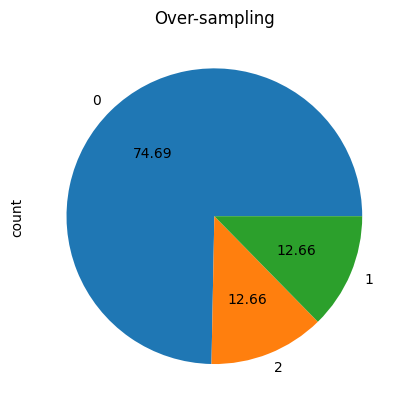

In [35]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = {0: 70996, 1: 12030, 2: 12030})

X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

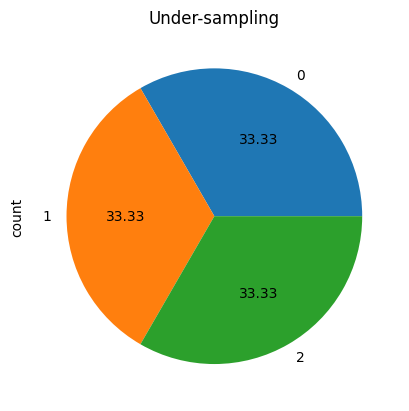

In [36]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = {0: 12030, 1: 12030, 2: 12030})

X_res, y_res = rus.fit_resample(X_res, y_res)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [37]:
X_res = X_res.reset_index(drop=True)
y_res = y_res.reset_index(drop=True)

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
components = tsne.fit_transform(X=X_res)

df_tsne = pd.DataFrame(components, columns=['tsne_components_1', 'tsne_components_2', 'tsne_components_3'])
df_tsne['stress'] = y_res
df_tsne.head()

tsne_components_1  tsne_components_2  tsne_components_3  stress
0           3.821866           9.910277          17.042158       0
1           8.488740          16.634844          -8.753941       0
2           8.210697           6.219184           2.032696       0
3          -1.456807           7.723743         -19.763416       0
4          -0.570247          10.676601          12.607430       0

In [39]:
fig = px.scatter_3d(df_tsne, x='tsne_components_1', y='tsne_components_2', z='tsne_components_3', color='stress')
fig.show()

### Cold Analysis

In [40]:
df_cold = df.query('stress == "-" or stress == "cold"').replace('cold', 1).replace('-', 0)
df_cold

<ipython-input-40-ce0b936f9180>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



stress  wc_3mer_1  wc_3mer_2  wc_3mer_3   wc_3mer_4   wc_3mer_5  \
0            0  -8.660600 -17.171770 -20.124799   10.607480   -0.194991   
1            0  -4.623322 -42.058749 -73.491472  -51.222795   83.974883   
2            0 -23.932238 -17.885510 -54.202845   15.682650  -30.424396   
3            0 -42.541243 -44.121847 -54.312436  -37.621338   53.242821   
4            0  -9.970732  20.265143  -4.832509   39.979788   -9.345131   
...        ...        ...        ...        ...         ...         ...   
101828       0 -31.971423  46.936561  37.374460   24.961271  -20.605168   
101829       0  -7.262153  24.640844  -6.384969  -38.287346    7.022847   
101830       0 -75.265843  89.033060  39.742789    1.053011  -37.685334   
101831       0  82.905541  27.218369 -27.637714 -128.632740  143.095296   
101832       0  50.834929  20.583651 -16.201569  -80.610470   94.104993   

        wc_3mer_6   wc_3mer_7   wc_3mer_8  wc_3mer_9  wc_3mer_10  wc_3mer_11  \
0        1.568289    3.896590    7.622823  -2.833792   13.902024    0.901370   
1      -47.219114  -20.222901   29.187759 -17.144830   37.219912   23.798238   
2       13.430986  -15.981544   27.324571  24.285038  -17.966888  -16.194634   
3        6.651359   -9.533580   22.141600 -23.691575    9.283776   -0.551763   
4       -2.708796   13.024784    8.689754  20.483825  -24.362307    2.615833   
...           ...         ...         ...        ...         ...         ...   
101828 -39.592321   42.670800  -18.597109  -0.516079  -42.961591   50.892728   
101829  -3.239892   -1.993565   -7.791742   5.026012   -5.188422   -6.105688   
101830 -40.503932   34.544268  -78.418910   6.234182  -62.653580   42.034284   
101831 -70.905655  106.884221  108.640803  83.382829  -93.997446   54.393699   
101832 -49.374542   75.415124   76.506384  48.100761  -63.283652   36.048902   

        wc_3mer_12  wc_3mer_13  wc_3mer_14  wc_3mer_15  wc_3mer_16  \
0        34.078852    7.308762  -22.336659   -6.828404   -8.725470   
1        75.641953    4.870120  -70.222621  -82.996107   33.535224   
2        37.701170    4.238578  -22.092493   29.940143  -44.784022   
3        43.312915  -13.855027  -56.051942  -42.767791   20.931579   
4        39.985003    3.863229   -8.952802   50.770334  -37.559995   
...            ...         ...         ...         ...         ...   
101828   -3.091227  -33.323442  -49.736310   25.541413  -23.784068   
101829  -10.535158  -11.942667  -30.272594   -1.186728   -2.757622   
101830   -2.987170  -35.465282  -55.077387   -7.782660  -38.721692   
101831   21.921141  -75.758687 -110.659455  183.831625 -107.061907   
101832    9.291009  -49.774890  -72.349354  124.349524  -68.266276   

        wc_3mer_17  wc_3mer_18  wc_3mer_19  wc_3mer_20  wc_3mer_21  \
0        -8.180239   11.367680   -4.852785  -13.413974  -27.984812   
1        76.461872   32.874154   -6.631312  -15.925581 -112.060691   
2       -15.890628   53.919895  -35.991584    4.866899  -50.060959   
3        80.680289   66.960003  -25.666703   11.878750  -63.000079   
4       -60.421734   54.505319    3.034000  -12.866485  -28.546683   
...            ...         ...         ...         ...         ...   
101828    0.621002    0.921360   53.535025    3.347017  -37.008955   
101829   -9.118238   -6.694140    6.155336   14.225451  -35.271374   
101830    3.579374   28.045091   78.666087  -17.353404  -99.694184   
101831    6.241472    1.876152   54.610687  -34.038759 -148.232319   
101832    3.276429   -1.796036   39.082664  -24.837813  -96.251302   

        wc_3mer_22  wc_3mer_23  wc_3mer_24  wc_3mer_25  wc_3mer_26  \
0         3.740348   -7.190613    0.278378   -3.571699    9.958542   
1        -2.903517    2.948585  -62.907868  -66.399708  143.480368   
2       -68.376555    2.019449   40.040754   23.633098  -45.153754   
3       -27.702760   28.601403  -47.963099  -50.641645   66.162401   
4        11.264910  -11.581891   28.874454   15.950151  -63.739680   
...            ...         ...         ...  

In [41]:
df_cold['stress'].value_counts()

stress
0    70996
1     5724
Name: count, dtype: int64

In [42]:
# Define X and y target variables
X = df_cold.drop(['stress'], axis=1)
y = df_cold['stress']

In [43]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(sampling_strategy=1)

X_res, y_res = ros.fit_resample(X, y)

In [44]:
y_res.value_counts()

stress
0    5724
1    5724
Name: count, dtype: int64

In [45]:
X_res = X_res.reset_index(drop=True)
y_res = y_res.reset_index(drop=True)

In [46]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
components = tsne.fit_transform(X=X_res)

df_tsne = pd.DataFrame(components, columns=['tsne_components_1', 'tsne_components_2', 'tsne_components_3'])
df_tsne['stress'] = y_res
df_tsne.head()

tsne_components_1  tsne_components_2  tsne_components_3  stress
0           0.121087          12.750560          -8.367110       0
1          -0.440072         -20.282080           3.849433       0
2          -4.404724          -5.075815          10.781209       0
3           3.123864           5.630447         -15.849972       0
4         -18.820322          -1.386686           1.896283       0

In [47]:
import plotly.express as px

fig = px.scatter_3d(df_tsne, x='tsne_components_1', y='tsne_components_2', z='tsne_components_3', color='stress')
fig.show()